In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# defining a function that will help us quickly calulate an average of a list
def avgOfList(list):
    return sum(list) / len(list)

# reading in the production spreadsheet
df = pd.read_csv(r'well production.csv')
df.sort_values('well name', axis = 0)
# making list of well names
listOfWellNames = df['well name'].values
listOfFiles = []

# reading in spreadsheets of well data
for i in listOfWellNames:
    j = pd.read_csv((i + '.csv'))
    listOfFiles.append(j)
    
# creating easting and northing data to plot a map of the wells
easting = []
northing = []
for i in listOfFiles:
    easting.append(i.easting.values)
    northing.append(i.northing.values)

In [2]:
# creating 2D arrays of all values for each feature, from each well file so they can be plotted later
porosity = []
permeability = []
poissonRatio = []
youngMod = []
waterSat = []
oilSat = []
thickness = []
proppWt = []
pumpRt = []

for i in listOfFiles:
    porosity.append(i.porosity.values)
    permeability.append(i.permeability.values)
    poissonRatio.append(i["Poisson's ratio"].values)
    youngMod.append(i["Young's Modulus"].values)
    waterSat.append(i['water saturation'].values)
    oilSat.append(i['oil saturation'].values)
    thickness.append(i['thickness (ft)'].values)
    proppWt.append(i['proppant weight (lbs)'].values)
    pumpRt.append(i['pump rate (cubic feet/min)'].values)

# create lists that contain average value for the feature from each well
avgNorth = []
for well in northing:
    avgNorth.append(avgOfList(well))
avgEast = []
for well in easting:
    avgEast.append(avgOfList(well))
avgPor = []
for well in porosity:
    avgPor.append(avgOfList(well))
avgPerm = []
for well in permeability:
    avgPerm.append(avgOfList(well))
avgPR = []
for well in poissonRatio:
    avgPR.append(avgOfList(well))
avgYM = []
for well in youngMod:
    avgYM.append(avgOfList(well))
avgWS = []
for well in waterSat:
    avgWS.append(avgOfList(well))
avgOS = []
for well in oilSat:
    avgOS.append(avgOfList(well))
avgThk = []
for well in thickness:
    avgThk.append(avgOfList(well))
avgPRPWT = []
numFracs = []
for well in proppWt:
    well_mean = np.nanmean(well, axis=0)
    inds = np.where(np.isnan(well))
    well[inds] = well_mean
    avgPRPWT.append(avgOfList(well))
    numFracs.append(len(well)-len(inds[0]))
avgPMPRT = []
for well in pumpRt:
    well_mean = np.nanmean(well, axis=0)
    inds = np.where(np.isnan(well))
    well[inds] = well_mean
    avgPMPRT.append(avgOfList(well))

#add all these lists to dataframe as additional columns
df['average northing'] = avgNorth
df['average easting'] = avgEast
df['averagePorosity'] = avgPor
df['averagePermeability'] = avgPerm
df['average poissons ratio'] = avgPR
df['average youngs modulus'] = avgYM
df['average water saturation'] = avgWS
df['averageOilSaturation'] = avgOS
df['average thickness'] = avgThk
df['average proppant weight'] = avgPRPWT
df['average pump rate'] = avgPMPRT
df['num frac stages'] = numFracs
df

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,averagePorosity,averagePermeability,average poissons ratio,average youngs modulus,average water saturation,averageOilSaturation,average thickness,average proppant weight,average pump rate,num frac stages
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,0.0785,0.02697,0.32662,6.277894e+06,0.081318,0.918682,27.492502,910422.941447,294.800448,100
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,0.0595,0.01507,0.30587,1.085445e+07,0.035204,0.964796,31.828707,728628.013775,288.362177,50
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,0.0500,0.01062,0.34421,5.329992e+06,0.230831,0.769169,4.604195,988860.773545,290.685170,25
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,0.0717,0.02261,0.30560,1.027616e+07,0.071061,0.928939,57.315355,690947.011162,298.807597,34
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.0172,0.00159,0.33157,8.748671e+06,0.093772,0.906228,2.231946,832067.579729,295.943915,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,0.0865,0.03251,0.29837,8.963008e+06,0.199008,0.800992,99.653394,734352.239635,289.977042,100
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.0137,0.00090,0.31143,8.770838e+06,0.098419,0.901581,5.000000,718291.597013,301.840799,25
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,0.0876,0.03388,0.29815,8.970672e+06,0.198491,0.801509,100.040793,786816.473580,294.023938,100
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,0.0814,0.02966,0.31488,7.178213e+06,0.074205,0.925795,54.119562,692306.209005,304.578816,34


In [3]:
pressure = []
rf = []
dfPressures = df['average pressure (Pa)'].values
dfRF = df['recovery factor'].values
for i in range (0,len(df)):
    wellP = []
    wellRF = []
    for j in range(0,100):
        wellP.append(dfPressures[i])
        wellRF.append(dfRF[i])
    pressure.append(wellP)
    rf.append(wellRF)

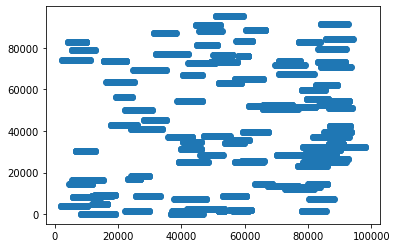

In [4]:
# map of wells
plt.scatter(easting, northing)

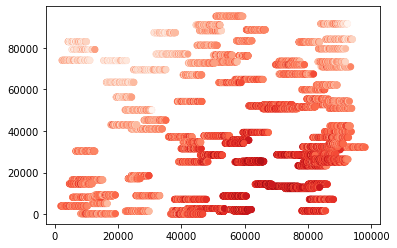

In [5]:
# map of wells colored by porosity
# high porosity at (70, 10)
plt.scatter(easting, northing, c = porosity,cmap="Reds")

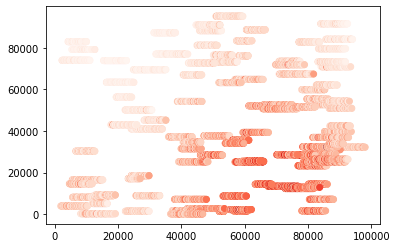

In [6]:
# map of wells colored by permeability
# looks uniform
plt.scatter(easting, northing, c = permeability, cmap = "Reds")

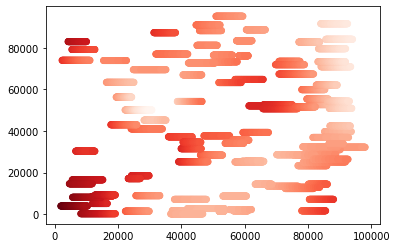

In [7]:
# map of wells colored by PR
plt.scatter(easting, northing, c = poissonRatio, cmap = "Reds")

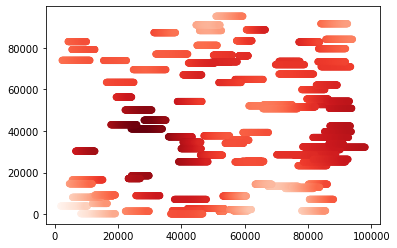

In [8]:
# map of wells colored by YM
plt.scatter(easting, northing, c = youngMod, cmap = "Reds")

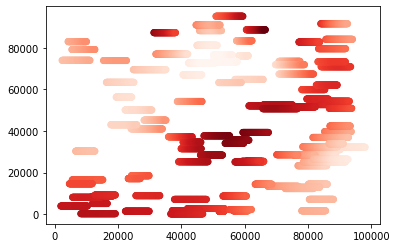

In [9]:
# map of wells colored by water saturation
plt.scatter(easting, northing, c = waterSat, cmap = "Reds")

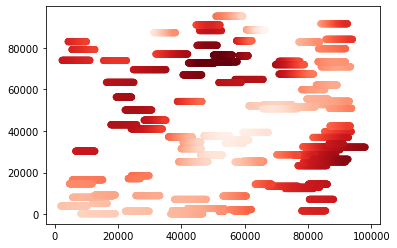

In [10]:
# map of wells colored by oil saturation
# hotspot for oil at (90, 30) and (50,70)
plt.scatter(easting, northing, c = oilSat, cmap = "Reds")

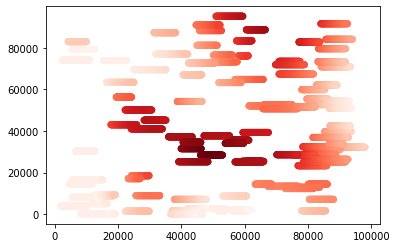

In [11]:
# map of wells colored by thickness
# thicker toward center of reservoir
plt.scatter(easting, northing, c = thickness, cmap = "Reds")

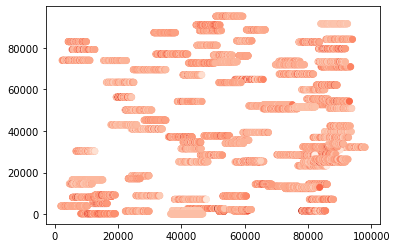

In [12]:
# map of wells colored by proppant rate
# looks uniform
plt.scatter(easting, northing, c = proppWt, cmap = "Reds")

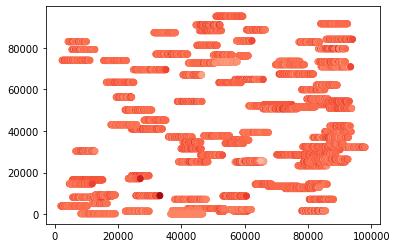

In [13]:
# map of wells colored by pump rate
# looks uniform
plt.scatter(easting, northing, c = pumpRt, cmap = "Reds")

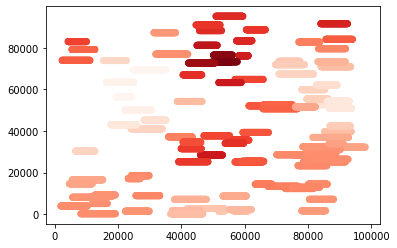

In [14]:
plt.scatter(easting, northing, c = pressure, cmap = "Reds")

In [15]:
avgRR = avgOfList(df['recovery factor'].values)
avgRR

0.09490102068043484

In [16]:
# find wells that are above 75th percentile for average porosity, oil saturation, and permeability

# 75th percentile values (cutoffs)
porosityCutoff = df['averagePorosity'].quantile(.75)
oilSatCutoff = df['averageOilSaturation'].quantile(.75)
permCutoff = df['averagePermeability'].quantile(.75)

dfCutoff = df.query('averagePorosity > @porosityCutoff and averagePermeability > @permCutoff and averageOilSaturation > @oilSatCutoff')

namesOfBest = dfCutoff['well name']
eastOfBest = dfCutoff['average easting']
northOfBest = dfCutoff['average northing']

dfCutoff

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,averagePorosity,averagePermeability,average poissons ratio,average youngs modulus,average water saturation,averageOilSaturation,average thickness,average proppant weight,average pump rate,num frac stages
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,0.0717,0.02261,0.30560,1.027616e+07,0.071061,0.928939,57.315355,690947.011162,298.807597,34
6,State 3-95H,36312036,0.100918,1.6,320.0,321.0,310.0,281.0,269.0,217.0,...,0.0793,0.02797,0.30788,9.374241e+06,0.069211,0.930789,69.399172,738574.184232,303.204767,34
16,State 3-156H,36169798,0.102831,1.6,419.0,407.0,412.0,342.0,308.0,299.0,...,0.0746,0.02417,0.31012,9.939256e+06,0.051722,0.948278,60.933054,779959.862494,303.897585,50
73,Brisket 10-65H,36199370,0.097415,1.6,506.0,483.0,468.0,430.0,372.0,369.0,...,0.0806,0.02811,0.31912,8.361116e+06,0.065860,0.934140,58.052313,843728.433578,302.781780,50
81,Pole 14-200H,36084417,0.104752,1.6,378.0,378.0,356.0,344.0,298.0,256.0,...,0.0729,0.02318,0.31066,1.018940e+07,0.042053,0.957947,55.034841,771916.692130,298.543783,50
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,0.0814,0.02966,0.31488,7.178213e+06,0.074205,0.925795,54.119562,692306.209005,304.578816,34


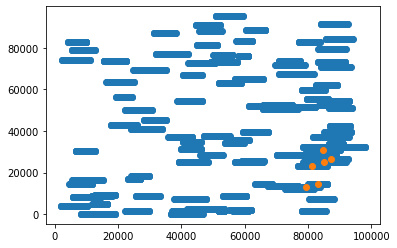

In [17]:
plt.scatter(easting, northing)
plt.scatter(eastOfBest, northOfBest, cmap = "Reds") # the more optimal existing wells as found in previous cell

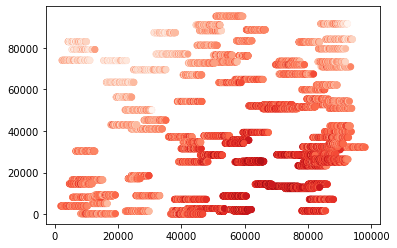

In [18]:
plt.scatter(easting, northing, c = porosity, cmap = "Reds") # just to check the above graph against features again

In [19]:
# find length of each well and append this as column to main dataframe
spreadOfWells = []
for i in range(len(easting)):
    spreadOfWells.append(easting[i].max() - easting[i].min())
df['length of well'] = spreadOfWells

In [20]:
df['average easting']

0     81782.32
1     93221.44
2     13681.29
3     84831.86
4      9038.00
        ...   
95    62570.50
96    19027.67
97    62859.20
98    79389.72
99    65947.32
Name: average easting, Length: 100, dtype: float64

In [21]:
# set containing all the different latitudes where wells exist
northingVals = set()
for n in northing:
    northingVals.add(n[0])

In [22]:
# map: northing vals mapped to list of easting vals from each well
occupiedSpaces = dict()
occupiedSpaces = occupiedSpaces.fromkeys(northingVals)

for key in occupiedSpaces:
    occupiedSpaces[key] = []
    
for i in range (0,len(easting)):
    occupiedSpaces[northing[i][0]].append(easting[i])

In [23]:
#return true if a location already has a well there
def spaceOccupied(e, n):
    if not n in occupiedSpaces:
        return False
    #there is a well somewhere on this latitude so we will check that
    wellsAtNorthing = occupiedSpaces[n]
    for i in range (0, len(wellsAtNorthing)):
        # check for each well if e falls between the max easting and min easting of this
        if wellsAtNorthing[i].min() <= e and wellsAtNorthing[i].max() >= e:
            return True
    return False

In [24]:
# Marco and I assume H is thickness
# E prime = E / (1 - v**2) where E = youngs modulus and v = poissons ratio
# w = (2H / E prime) * p
# w * L = A
# then grab OOIP and RR for wells :) 
def ePrime(E, v):
    return E / (1 - (v ** 2))
E = []
dfYM = df['average youngs modulus'].values
dfPR = df['average poissons ratio'].values
for i in range(0, len(df)):
    E.append(ePrime(dfYM[i], dfPR[i]))
df['average plane strain'] = E
df

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,average poissons ratio,average youngs modulus,average water saturation,averageOilSaturation,average thickness,average proppant weight,average pump rate,num frac stages,length of well,average plane strain
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,0.32662,6.277894e+06,0.081318,0.918682,27.492502,910422.941447,294.800448,100,7565.0,7.027603e+06
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,0.30587,1.085445e+07,0.035204,0.964796,31.828707,728628.013775,288.362177,50,9643.0,1.197476e+07
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,0.34421,5.329992e+06,0.230831,0.769169,4.604195,988860.773545,290.685170,25,10963.0,6.046368e+06
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,0.30560,1.027616e+07,0.071061,0.928939,57.315355,690947.011162,298.807597,34,10664.0,1.133472e+07
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,0.33157,8.748671e+06,0.093772,0.906228,2.231946,832067.579729,295.943915,50,7276.0,9.829290e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,0.29837,8.963008e+06,0.199008,0.800992,99.653394,734352.239635,289.977042,100,6941.0,9.838914e+06
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,0.31143,8.770838e+06,0.098419,0.901581,5.000000,718291.597013,301.840799,25,7255.0,9.712877e+06
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,0.29815,8.970672e+06,0.198491,0.801509,100.040793,786816.473580,294.023938,100,4318.0,9.845909e+06
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,0.31488,7.178213e+06,0.074205,0.925795,54.119562,692306.209005,304.578816,34,8579.0,7.968262e+06


In [25]:
# calculate width and area of each well
# h = thickness, e = plane strain, p = pressure
def width(H, E, P):
    return ((2 * H * P) / E)

dfThick = df['average thickness'].values
dfPS = df['average plane strain'].values
dfPressure = df['average pressure (Pa)'].values
dfLength = df['length of well'].values

W = []
A = []

for i in range(0,len(df)):
    W.append(width(dfThick[i], dfPS[i], dfPressure[i]))
df['average width'] = W

for i in range(0,len(df)):
    A.append(W[i] * dfLength[i])
df['area'] = A

In [26]:
df.columns

Index(['well name', 'average pressure (Pa)', 'recovery factor',
       'formation volume factor', 'oil 1', 'oil 2', 'oil 3', 'oil 4', 'oil 5',
       'oil 6', 'oil 7', 'oil 8', 'oil 9', 'oil 10', 'oil 11', 'oil 12',
       'water 1', 'water 2', 'water 3', 'water 4', 'water 5', 'water 6',
       'water 7', 'water 8', 'water 9', 'water 10', 'water 11', 'water 12',
       'average northing', 'average easting', 'averagePorosity',
       'averagePermeability', 'average poissons ratio',
       'average youngs modulus', 'average water saturation',
       'averageOilSaturation', 'average thickness', 'average proppant weight',
       'average pump rate', 'num frac stages', 'length of well',
       'average plane strain', 'average width', 'area'],
      dtype='object')

In [27]:
# calculate original oil in place
FORMATION_FACTOR = 1.6
FEET_ACRES = 43560

# A = area (acres), H = reservoir thickness (ft), P = porosity (%), O = oil saturation (%)
def OOIP(A, H, P, O):
    return 7758 * A * H * P * O / (FORMATION_FACTOR * FEET_ACRES) 

dfPor = df['averagePorosity'].values
dfOS = df['averageOilSaturation'].values

# calculate OOIP for each well and then append these values as column to dataframe
ooip = []
for i in range(0,len(df)):
    ooip.append(OOIP(A[i],dfThick[i],dfPor[i],dfOS[i]))
df['OOIP'] = ooip

In [28]:
# calculate recoverable reserves for each well and then append these values as column to main dataframe
rr = []
for name in df['well name'].values:
    index = list(df['well name'].values).index(name)
    rr.append(df.iloc[index]["OOIP"] * df.iloc[index]["recovery factor"])
df['recoverable reserves'] = rr

In [29]:
df['recoverable reserves']

0      42742.146117
1      39169.645992
2        939.373412
3     170298.603559
4         41.652356
          ...      
95    401175.750050
96       195.020559
97    252654.749087
98    196913.902533
99    142750.830761
Name: recoverable reserves, Length: 100, dtype: float64

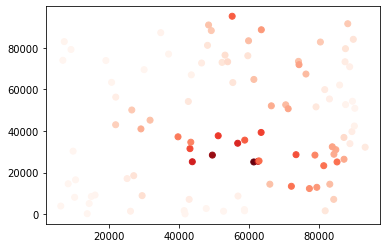

In [30]:
# plot the OOIP for each well, using the midpoint of each well as the location
plt.scatter(df['average easting'], df['average northing'], c = df['OOIP'], cmap = "Reds")

In [31]:
df['recoverable reserves'].values

array([4.27421461e+04, 3.91696460e+04, 9.39373412e+02, 1.70298604e+05,
       4.16523564e+01, 1.64722732e+04, 2.56190208e+05, 5.27290049e+04,
       2.17961689e+05, 1.32406723e+05, 1.04890031e+03, 2.83341290e+04,
       7.24038412e+03, 3.74843469e+04, 1.19556378e+05, 3.24206494e+04,
       2.63900133e+05, 2.19145877e+05, 7.89550529e+02, 4.73204534e+05,
       3.97342040e+02, 2.95855221e+05, 2.53150706e+02, 3.29562325e+04,
       2.80765933e+05, 1.23946484e+05, 3.18571718e+02, 1.65064007e+05,
       1.02709565e+05, 1.31698566e+03, 3.02277718e+05, 5.11305205e+04,
       1.31129177e+05, 1.02973097e+03, 2.10298614e+05, 5.00139789e+04,
       1.60189556e+05, 1.11359483e+05, 6.20439263e+03, 2.67207920e+04,
       1.13747534e+04, 5.76738422e+04, 1.00972837e+05, 6.16794604e+04,
       5.17888287e+05, 8.90670435e+04, 1.37824772e+05, 3.43206571e+04,
       2.49496899e+03, 2.78157849e+03, 2.49194012e+03, 7.43790230e+03,
       1.37017771e+04, 3.75930882e+04, 7.07539882e+03, 5.25516806e+03,
      

In [32]:
oilProd = []
oilProd.append(df['oil 1'].values)
oilProd.append(df['oil 2'].values)
oilProd.append(df['oil 3'].values)
oilProd.append(df['oil 4'].values)
oilProd.append(df['oil 5'].values)
oilProd.append(df['oil 6'].values)
oilProd.append(df['oil 7'].values)
oilProd.append(df['oil 8'].values)
oilProd.append(df['oil 9'].values)
oilProd.append(df['oil 10'].values)
oilProd.append(df['oil 11'].values)
oilProd.append(df['oil 12'].values)

# calculate total production of a well over the year
def productionOfWell(index):
    total = 0
    for i in range(0,len(oilProd)):
        if not math.isnan(oilProd[i][index]):
            total += oilProd[i][index]
    return total

In [33]:
# calculate total production for all wells and save this as part of data
wellProd = []
for i in range(0,len(df)):
    wellProd.append(productionOfWell(i))
df['total production'] = wellProd
df

,well name,average pressure (Pa),recovery factor,formation volume factor,oil 1,oil 2,oil 3,oil 4,oil 5,oil 6,...,average proppant weight,average pump rate,num frac stages,length of well,average plane strain,average width,area,OOIP,recoverable reserves,total production
0,Peak 6-217H,35352874,0.092554,1.6,862.0,824.0,759.0,728.0,661.0,601.0,...,910422.941447,294.800448,100,7565.0,7.027603e+06,276.606110,2.092525e+06,4.618082e+05,42742.146117,6808.0
1,Tarragon 4-119H,34882173,0.107706,1.6,228.0,249.0,214.0,210.0,161.0,163.0,...,728628.013775,288.362177,50,9643.0,1.197476e+07,185.432372,1.788124e+06,3.636731e+05,39169.645992,1968.0
2,Fennel 10-129H,36064538,0.079150,1.6,67.0,85.0,73.0,73.0,57.0,58.0,...,988860.773545,290.685170,25,10963.0,6.046368e+06,54.924928,6.021420e+05,1.186824e+04,939.373412,736.0
3,Federal 14-113H,35817881,0.103748,1.6,256.0,242.0,267.0,263.0,199.0,191.0,...,690947.011162,298.807597,34,10664.0,1.133472e+07,362.234607,3.862870e+06,1.641457e+06,170298.603559,2204.0
4,King 7-184H,38442406,0.084675,1.6,23.0,29.0,31.0,50.0,72.0,52.0,...,832067.579729,295.943915,50,7276.0,9.829290e+06,17.458309,1.270267e+05,4.919109e+02,41.652356,490.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pole 11-4H,38969367,0.095266,1.6,981.0,921.0,873.0,821.0,737.0,673.0,...,734352.239635,289.977042,100,6941.0,9.838914e+06,789.402069,5.479240e+06,4.211132e+06,401175.750050,7605.0
96,Burger 6-148H,31737857,0.119667,1.6,5.0,47.0,12.0,6.0,54.0,1.0,...,718291.597013,301.840799,25,7255.0,9.712877e+06,32.676062,2.370648e+05,1.629688e+03,195.020559,315.0
97,King 14-184H,38890043,0.094694,1.6,1053.0,997.0,954.0,875.0,794.0,737.0,...,786816.473580,294.023938,100,4318.0,9.845909e+06,790.295935,3.412498e+06,2.668112e+06,252654.749087,8279.0
98,Tribal 14-4H,36454201,0.102102,1.6,332.0,343.0,305.0,273.0,266.0,275.0,...,692306.209005,304.578816,34,8579.0,7.968262e+06,495.185897,4.248200e+06,1.928592e+06,196913.902533,2780.0


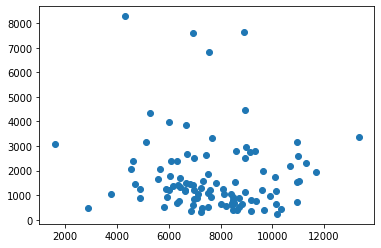

In [34]:
# oil production vs length of well
prod = df['total production'].values
length = df['length of well'].values
plt.plot(length,prod,'o')

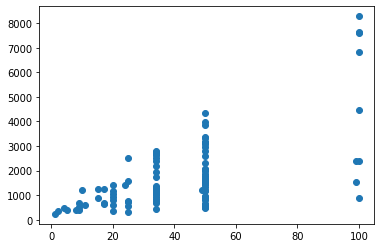

In [35]:
# oil production vs num frac stages 
numFracs = df['num frac stages'].values
plt.plot(numFracs,prod,'o')

# greater production achievable with more stages but more expensive? 50 looks good

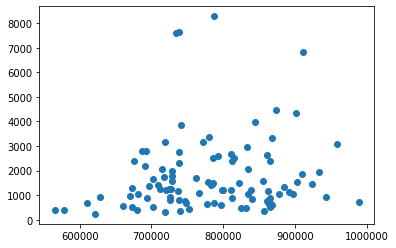

In [36]:
propPerStage = df['average proppant weight'].values
pumpPerStage = df['average pump rate'].values
plt.scatter(propPerStage,prod)

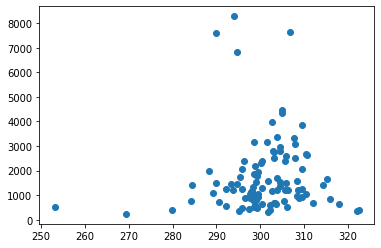

In [37]:
plt.scatter(pumpPerStage,prod)

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
# split up XY plane between spaces with existing wells and open spaces
northPredict = []
eastPredict = []

northOccupied = []
eastOccupied = []

i = 0
j = 0
for i in range (0, 1000):
    northTest = i*100
    for j in range(0,1000):
        eastTest = j*100
        if spaceOccupied(eastTest,northTest):
            eastOccupied.append(eastTest)
            northOccupied.append(northTest)
        else:
            eastPredict.append(eastTest)
            northPredict.append(northTest)
    
# northPredict and eastPredict are the open spaces that regressions will be run to predict for

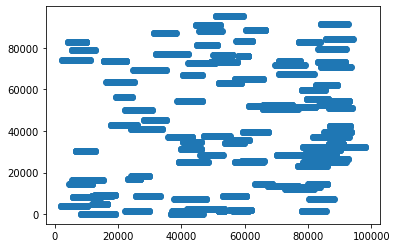

In [40]:
plt.scatter(easting,northing)

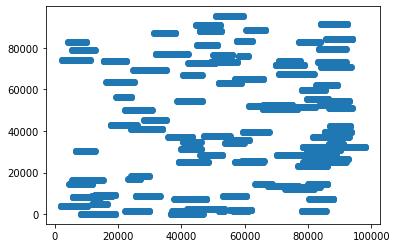

In [41]:
# these are the values that have been removed from the set of possible easting-northing pairs and as you can see,
# they match the locations of the wells
plt.scatter(eastOccupied,northOccupied)

# when plotting the predictions will still look like they have been applied to the entire map but no worries, 
# these values have already been removed from the data set

In [42]:
# xPredict is set of easting, northing pairs for treeReg to predict on
xPredict = np.array([np.array([eastPredict]).flatten(),np.array([northPredict]).flatten()])
xPredict = xPredict.transpose()

# pulls the easting-northing values for the existing wells.
existingLocations = np.array([np.array([easting]).flatten(),np.array([northing]).flatten()]) # indep var = coordinates
existingLocations = existingLocations.transpose()

# do these constructions once for efficiency because they will be reused many times

In [43]:
# function that runs a regression for a given list of values on the rest of the easting-northing plane
# returns a list of predicted values for each easting-northing pair in xPredict (2-d array)
    
def predictor(predict):
    tree = DecisionTreeRegressor()
    
    # dependent variable is the metric that was passed in
    y = np.array([predict]).flatten()
    y = y.reshape(-1,1)
    
    tree.fit(existingLocations,y)
    print(tree.score(existingLocations,y))
    
    # predict the thing
    Predict = tree.predict(xPredict)
    #plt.scatter(eastPredict,northPredict, c = Predict, cmap = "Reds")
    return Predict

porosityPred = predictor(porosity)

1.0


In [44]:
# comment out for now so it doesn't take forever to run
# plt.scatter(eastPredict,northPredict, c = porosityPred, cmap = "Reds")

In [45]:
# plt.scatter(easting,northing, c = porosity, cmap = "Reds")

In [46]:
permPredict = predictor(permeability)

0.9999993335868556


In [47]:
poissPredict = predictor(poissonRatio)

0.9999604499554854


In [48]:
ymPredict = predictor(youngMod)

1.0


In [49]:
wsPredict = predictor(waterSat)

0.9999923878339204


In [50]:
osPredict = predictor(oilSat)

0.9999923878339204


In [51]:
thicknessPredict = predictor(thickness)

0.9999999999998567


In [52]:
propwtPredict = predictor(proppWt)

1.0


In [53]:
pumprtPredict = predictor(pumpRt)

1.0


In [54]:
pressurePredict = predictor(pressure)

1.0


In [55]:
rfPredict = predictor(rf)

0.9999799344847325


In [56]:
# run each feature through decision tree and organize info in dataframe
predData = pd.DataFrame()
predData["Easting"] = eastPredict
predData["Northing"] = northPredict
predData["Porosity"] = porosityPred
predData['Permeability'] = permPredict
predData['PoissonRatio'] = poissPredict
predData['YoungsModulus'] = ymPredict
predData['WaterSaturation'] = wsPredict
predData['OilSaturation'] = osPredict
predData['Thickness'] = thicknessPredict
predData['ProppantWeight'] = propwtPredict
predData['PumpRate'] = pumprtPredict
predData['Pressure'] = pressurePredict
predData['RecoveryFactor'] = rfPredict

In [57]:
EPrimePred = []

for i in range(0,len(predData)):
    EPrimePred.append(ePrime(ymPredict[i], poissPredict[i]))
predData['PlaneStrain'] = EPrimePred

widthPred = []
for i in range(0,len(predData)):
    widthPred.append(width(thicknessPredict[i], EPrimePred[i], pressurePredict[i]))
predData['Width'] = widthPred

In [58]:
# A = area (acres), H = reservoir thickness (ft), P = porosity (%), O = oil saturation (%)
predOOIP = []

for i in range(0,len(predData)):
    # calculate in differentials of 100, because prediction points were spaced 100 units apart
    predOOIP.append(OOIP(widthPred[i]*100,thicknessPredict[i],porosityPred[i],osPredict[i]))   
predData['OOIP'] = predOOIP

In [59]:
predRR = []
predRF = predData['RecoveryFactor']
for i in range(0,len(predData)):
    predRR.append(predOOIP[i]*predRF[i])   
predData['RR'] = predRR

In [60]:
porQuant = predData['Porosity'].quantile(.5)
permQuant = predData['Permeability'].quantile(.5)
osQuant = predData['OilSaturation'].quantile(.5)

In [61]:
#75th percentile vals for each
bestWells = predData.query('Porosity >= @porQuant and Permeability >= @permQuant and OilSaturation >= @osQuant')
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure,RecoveryFactor,PlaneStrain,Width,OOIP,RR
620,62000,0,0.10,0.037,0.302,5767283.903,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.346071e+06,52.836130,254.179919,30.493879
621,62100,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
622,62200,0,0.09,0.045,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
623,62300,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
624,62400,0,0.09,0.035,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991151,91100,99800,0.05,0.010,0.280,6979139.000,0.099141,0.900859,57.162593,786752.915613,302.281049,41995291.0,0.108309,7.572850e+06,633.991051,18170.377262,1968.013853
992126,88600,99900,0.07,0.013,0.283,7384818.490,0.125402,0.874598,64.816798,786752.915613,302.281049,41995291.0,0.108309,8.027753e+06,678.147481,29954.380816,3244.326496
992128,88800,99900,0.06,0.016,0.283,7347938.260,0.122913,0.877087,64.181774,786752.915613,302.281049,41995291.0,0.108309,7.987662e+06,674.873882,25372.918513,2748.113283
992139,89900,99900,0.07,0.019,0.282,7158009.953,0.110356,0.889644,60.753254,786752.915613,302.281049,41995291.0,0.108309,7.776422e+06,656.175949,27634.142397,2993.023990


In [62]:
# the locations where each of these 3 features are above 75th percentiles
eastBest = bestWells['Easting']
northBest = bestWells['Northing']

# the values for these better locations
porBest = bestWells['Porosity']
permBest = bestWells['Permeability']
osBest = bestWells['OilSaturation']

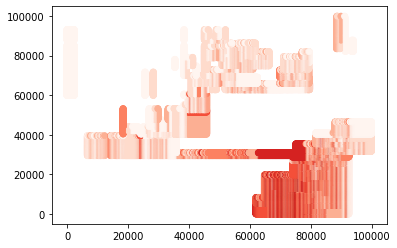

In [63]:
plt.scatter(eastBest,northBest, c = porBest, cmap = "Reds")

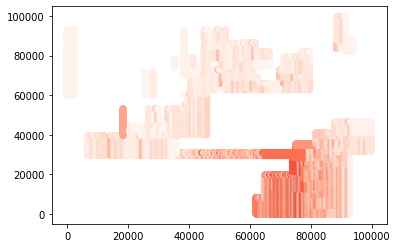

In [64]:
plt.scatter(eastBest, northBest, c=permBest, cmap = "Reds")

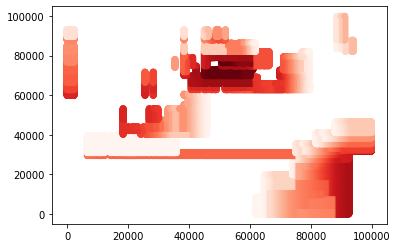

In [65]:
plt.scatter(eastBest, northBest, c = osBest, cmap = "Reds")

In [66]:
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure,RecoveryFactor,PlaneStrain,Width,OOIP,RR
620,62000,0,0.10,0.037,0.302,5767283.903,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.346071e+06,52.836130,254.179919,30.493879
621,62100,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
622,62200,0,0.09,0.045,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
623,62300,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
624,62400,0,0.09,0.035,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991151,91100,99800,0.05,0.010,0.280,6979139.000,0.099141,0.900859,57.162593,786752.915613,302.281049,41995291.0,0.108309,7.572850e+06,633.991051,18170.377262,1968.013853
992126,88600,99900,0.07,0.013,0.283,7384818.490,0.125402,0.874598,64.816798,786752.915613,302.281049,41995291.0,0.108309,8.027753e+06,678.147481,29954.380816,3244.326496
992128,88800,99900,0.06,0.016,0.283,7347938.260,0.122913,0.877087,64.181774,786752.915613,302.281049,41995291.0,0.108309,7.987662e+06,674.873882,25372.918513,2748.113283
992139,89900,99900,0.07,0.019,0.282,7158009.953,0.110356,0.889644,60.753254,786752.915613,302.281049,41995291.0,0.108309,7.776422e+06,656.175949,27634.142397,2993.023990


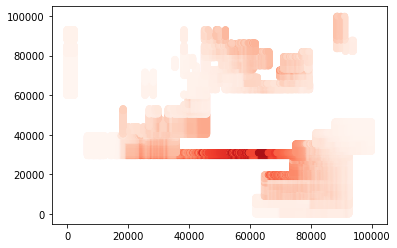

In [67]:
bestOOIP = bestWells['OOIP']
plt.scatter(eastBest,northBest,c = bestOOIP, cmap = "Reds")

In [68]:
northingVals = bestWells['Northing'].values
northingSet = set(northingVals)

In [69]:
# split this dataframe up into smaller dataframes based on northing values
groupByNorthing = []
for n in northingSet:
    groupByNorthing.append(bestWells.query('Northing == @n'))

In [70]:
# divide values into contiguous ranges, each where a new well can be placed
rangesByNorthing = dict()
for well in groupByNorthing:
    e = well['Easting'].values
    ranges = []
    start = e[0]
    for i in range(0,len(e)-1):
        # allowance of 100 ft between points
        if(e[i+1]-e[i]>100):
            # only keep ranges that are at least 7000 ft long (short ranges are pointless)
            if(e[i]-start >= 7000):
                ranges.append((start,e[i]))
            start = e[i+1]
    if(len(ranges)>0):
        rangesByNorthing[well.iloc[0]['Northing']] = ranges

In [71]:
rangesByNorthing

{0.0: [(64800, 78700)],
 4100.0: [(64800, 78700)],
 8200.0: [(64800, 85600)],
 12300.0: [(64800, 72700), (81800, 90900)],
 63500.0: [(63400, 71100)],
 16400.0: [(64800, 90900)],
 20500.0: [(74000, 85300)],
 28700.0: [(74100, 84300)],
 2100.0: [(64800, 78700)],
 6200.0: [(64800, 78700)],
 10300.0: [(64800, 85600)],
 14400.0: [(68600, 80000)],
 65600.0: [(63400, 71100)],
 18500.0: [(64800, 90900)],
 22600.0: [(74000, 85300)],
 30800.0: [(44700, 53100), (53300, 61500), (61700, 83500)],
 100.0: [(64800, 78700)],
 4200.0: [(64800, 78700)],
 8300.0: [(64800, 85600)],
 12400.0: [(64800, 90900)],
 63600.0: [(63400, 71100)],
 16500.0: [(64800, 90900)],
 20600.0: [(74000, 85300)],
 2200.0: [(64800, 78700)],
 6300.0: [(64800, 78700)],
 10400.0: [(64800, 85600)],
 14500.0: [(64800, 90900)],
 65700.0: [(63400, 71100)],
 18600.0: [(64800, 90900)],
 22700.0: [(74000, 85300)],
 26800.0: [(74000, 85300)],
 30900.0: [(44700, 53100), (53300, 61500), (61700, 83500)],
 200.0: [(64800, 78700)],
 4300.0: [(6

In [84]:
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure,RecoveryFactor,PlaneStrain,Width,OOIP,RR
620,62000,0,0.10,0.037,0.302,5767283.903,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.346071e+06,52.836130,254.179919,30.493879
621,62100,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
622,62200,0,0.09,0.045,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
623,62300,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
624,62400,0,0.09,0.035,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991151,91100,99800,0.05,0.010,0.280,6979139.000,0.099141,0.900859,57.162593,786752.915613,302.281049,41995291.0,0.108309,7.572850e+06,633.991051,18170.377262,1968.013853
992126,88600,99900,0.07,0.013,0.283,7384818.490,0.125402,0.874598,64.816798,786752.915613,302.281049,41995291.0,0.108309,8.027753e+06,678.147481,29954.380816,3244.326496
992128,88800,99900,0.06,0.016,0.283,7347938.260,0.122913,0.877087,64.181774,786752.915613,302.281049,41995291.0,0.108309,7.987662e+06,674.873882,25372.918513,2748.113283
992139,89900,99900,0.07,0.019,0.282,7158009.953,0.110356,0.889644,60.753254,786752.915613,302.281049,41995291.0,0.108309,7.776422e+06,656.175949,27634.142397,2993.023990


In [73]:
# returns index of target in thisList, beginning search at start index
# returns -1 if not found
def indexOf(thisList,target,start):
    for i in range(start,len(thisList)):
        if thisList[i] == target:
            return i
    return -1

In [87]:
easting = bestWells['Easting'].values
northing = bestWells['Northing'].values
ooip = bestWells['OOIP'].values
width = bestWells['Width'].values

# sums the ooip of a given range
def ooipOfRange(n,eStart, eEnd):
    total = 0
    i = indexOf(northing,n,0)
    j = indexOf(easting,eStart,i)
    while easting[j] < eEnd:
        total += ooip[j]
        j += 1
    return total

rr = bestWells['RR'].values
def rrOfRange(n,eStart, eEnd):
    total = 0
    i = indexOf(northing,n,0)
    j = indexOf(easting,eStart,i)
    while easting[j] < eEnd:
        total += rr[j]
        j += 1
    return total

def avgWidthOfRange(n, eStart, eEnd):
    total = 0
    count = 0
    i = indexOf(northing,n,0)
    j = indexOf(easting,eStart,i)
    while easting[j] < eEnd:
        total += width[j]
        count += 1
        j += 1
    return total/count

In [92]:
rangeN = []
eastStart = []
eastEnd = []
rangeOOIP = []
rangeRR = []
rangeWidth=[]

In [93]:
ooipOfRange(0,62000,62100)

254.17991936079093

In [94]:
bestWells

,Easting,Northing,Porosity,Permeability,PoissonRatio,YoungsModulus,WaterSaturation,OilSaturation,Thickness,ProppantWeight,PumpRate,Pressure,RecoveryFactor,PlaneStrain,Width,OOIP,RR
620,62000,0,0.10,0.037,0.302,5767283.903,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.346071e+06,52.836130,254.179919,30.493879
621,62100,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
622,62200,0,0.09,0.045,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
623,62300,0,0.09,0.036,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
624,62400,0,0.09,0.035,0.302,5743147.018,0.135633,0.864367,5.000000,621523.474663,269.402014,33530183.0,0.119970,6.319512e+06,53.058186,229.723352,27.559833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991151,91100,99800,0.05,0.010,0.280,6979139.000,0.099141,0.900859,57.162593,786752.915613,302.281049,41995291.0,0.108309,7.572850e+06,633.991051,18170.377262,1968.013853
992126,88600,99900,0.07,0.013,0.283,7384818.490,0.125402,0.874598,64.816798,786752.915613,302.281049,41995291.0,0.108309,8.027753e+06,678.147481,29954.380816,3244.326496
992128,88800,99900,0.06,0.016,0.283,7347938.260,0.122913,0.877087,64.181774,786752.915613,302.281049,41995291.0,0.108309,7.987662e+06,674.873882,25372.918513,2748.113283
992139,89900,99900,0.07,0.019,0.282,7158009.953,0.110356,0.889644,60.753254,786752.915613,302.281049,41995291.0,0.108309,7.776422e+06,656.175949,27634.142397,2993.023990


In [95]:
for n in rangesByNorthing:
    for r in rangesByNorthing[n]:
        rangeN.append(n)
        eastStart.append(r[0])
        eastEnd.append(r[1])
        rangeOOIP.append(ooipOfRange(n,r[0],r[1]))
        rangeRR.append(rrOfRange(n,r[0],r[1]))
        rangeWidth.append(avgWidthOfRange(n,r[0],r[1]))

In [96]:
ooipOfRanges = pd.DataFrame()
ooipOfRanges['Northing'] = rangeN
ooipOfRanges['EastStart'] = eastStart
ooipOfRanges['EastEnd'] = eastEnd
ooipOfRanges['OOIP'] = rangeOOIP
ooipOfRanges['RR'] = rangeRR
ooipOfRanges['AvgWidth'] = rangeWidth
ooipOfRanges.sort_values(by=['OOIP'], inplace = True, ascending=False)
ooipOfRanges

,Northing,EastStart,EastEnd,OOIP,RR,AvgWidth
213,29900.0,61700,83500,1.346047e+07,1.227088e+06,663.395336
161,29600.0,61700,83500,1.344875e+07,1.226056e+06,662.936213
179,29700.0,61700,83500,1.344875e+07,1.226056e+06,662.936213
143,29500.0,61700,83500,1.344875e+07,1.226056e+06,662.936213
196,29800.0,61700,83500,1.343906e+07,1.225157e+06,662.490029
...,...,...,...,...,...,...
214,3300.0,64800,78700,4.495762e+05,4.622894e+04,163.848981
144,2900.0,64800,78700,4.495762e+05,4.622894e+04,163.848981
26,2200.0,64800,78700,4.495762e+05,4.623049e+04,163.848981
9,2100.0,64800,78700,4.495762e+05,4.623049e+04,163.848981


In [126]:
ooipPruned = ooipOfRanges.reset_index(drop=True)

northingOfRange = ooipPruned['Northing'].values
eastStartOfRange = ooipPruned['EastStart'].values
eastEndOfRange = ooipPruned['EastEnd'].values
ooipOfRange = ooipPruned['OOIP'].values
widthOfRange = ooipPruned['AvgWidth'].values

eastMid = []
for i in range(0,len(eastStartOfRange)):
    eastMid.append((eastStartOfRange[i]+eastEndOfRange[i])/2)

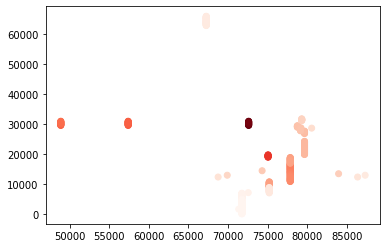

In [127]:
# midpoints of each of these ranges, colored by the range's predicted OOIP
plt.scatter(eastMid, northingOfRange, c=ooipOfRange, cmap = "Reds")

# note the difference in scale between this graph and previous, due to pruned values

In [120]:
DIFF_CONSTANT = 1000

def dropIndex(i1, i2):
    expectedDiff = widthOfRange[i1]/2+widthOfRange[i2]/2 + DIFF_CONSTANT
    actualDiff = abs(northingOfRange[i1]-northingOfRange[i2])
    if expectedDiff > actualDiff:
        # return the index of entry with smaller ooip
        ooip1 = ooipOfRange[i1]
        ooip2 = ooipOfRange[i2]
        if(ooip1>ooip2):
            return i2
        else:
            return i1
    # don't need to drop
    return -1

In [121]:
ooipPruned.sort_values('Northing',inplace = True)
ooipPruned.reset_index(inplace=True,drop=True)
ooipPruned

,Northing,EastStart,EastEnd,OOIP,RR,AvgWidth
0,0.0,64800,78700,4.611934e+05,47576.762473,178.866160
1,100.0,64800,78700,4.611934e+05,47576.762473,178.866160
2,200.0,64800,78700,4.611934e+05,47576.762473,178.866160
3,300.0,64800,78700,4.611934e+05,47576.762473,178.866160
4,400.0,64800,78700,4.611934e+05,47576.762473,178.866160
...,...,...,...,...,...,...
347,65500.0,63400,71100,1.246966e+06,123223.556655,449.285708
348,65600.0,63400,71100,1.246966e+06,123223.556655,449.285708
349,65700.0,63400,71100,1.246966e+06,123223.556655,449.285708
350,65800.0,63400,71100,1.246966e+06,123223.556655,449.285708


In [128]:
# remove the values that are too close together
index = len(ooipPruned)-1
while index>0:
    shouldDrop = dropIndex(index,index-1)
    if(shouldDrop>0):
        ooipPruned = ooipPruned.drop(shouldDrop)
    index -= 1
ooipPruned

,Northing,EastStart,EastEnd,OOIP,RR,AvgWidth
0,29900.0,61700,83500,1.346047e+07,1.227088e+06,663.395336
15,19200.0,64800,85300,8.831702e+06,9.551377e+05,584.971556
24,29900.0,53300,61500,7.528747e+06,6.997203e+05,978.790006
54,16400.0,64800,90900,6.123183e+06,6.447306e+05,499.281363
65,14100.0,64800,90900,6.076125e+06,6.392455e+05,500.450578
93,11600.0,64800,90900,5.702564e+06,6.060154e+05,500.430814
111,8900.0,64800,85600,4.793015e+06,4.930792e+05,527.114751
130,18100.0,64800,90900,4.726851e+06,4.947584e+05,381.810276
150,22000.0,74000,85300,3.824977e+06,3.860081e+05,531.950871
152,24100.0,74000,85300,3.824977e+06,3.860081e+05,531.950871


In [129]:
len(ooipPruned)

44

In [130]:
ooipPruned.sort_values('RR',inplace=True)
ooipPruned.reset_index(drop=True,inplace = True)

In [132]:
# prune further to top 10 only

eastStartOfRange = ooipPruned['EastStart'].values
eastEndOfRange = ooipPruned['EastEnd'].values
# first prune the wells that are less than 10000
index = len(ooipPruned)-1
while index >= 0:
    if(eastEndOfRange[index]-eastStartOfRange[index]<10000):
        ooipPruned = ooipPruned.drop(index)
    index -= 1
ooipPruned.reset_index(drop=True,inplace = True)
ooipPruned

,Northing,EastStart,EastEnd,OOIP,RR,AvgWidth
0,300.0,64800,78700,4.611934e+05,4.757676e+04,178.866160
1,1500.0,64800,78700,4.611934e+05,4.757676e+04,178.866160
2,1200.0,64800,78700,4.611934e+05,4.757676e+04,178.866160
3,1900.0,64800,78700,4.611934e+05,4.757676e+04,178.866160
4,100.0,64800,78700,4.611934e+05,4.757676e+04,178.866160
5,1800.0,64800,78700,4.611934e+05,4.757676e+04,178.866160
6,4700.0,64800,78700,4.644527e+05,4.763192e+04,169.101710
7,6800.0,64800,78700,6.536536e+05,7.036934e+04,246.615101
8,5400.0,64800,78700,6.618173e+05,7.077220e+04,249.711820
9,7100.0,64800,80300,7.311020e+05,7.726672e+04,238.449150


In [133]:
# now keep only the top 10
index = len(ooipPruned)-1
while index > 10:
    ooipPruned = ooipPruned.drop(index)
    index -= 1
ooipPruned.reset_index(drop=True,inplace = True)
ooipPruned

,Northing,EastStart,EastEnd,OOIP,RR,AvgWidth
0,300.0,64800,78700,4.611934e+05,47576.762473,178.866160
1,1500.0,64800,78700,4.611934e+05,47576.762473,178.866160
2,1200.0,64800,78700,4.611934e+05,47576.762473,178.866160
3,1900.0,64800,78700,4.611934e+05,47576.762473,178.866160
4,100.0,64800,78700,4.611934e+05,47576.762473,178.866160
5,1800.0,64800,78700,4.611934e+05,47576.762473,178.866160
6,4700.0,64800,78700,4.644527e+05,47631.922716,169.101710
7,6800.0,64800,78700,6.536536e+05,70369.338257,246.615101
8,5400.0,64800,78700,6.618173e+05,70772.198913,249.711820
9,7100.0,64800,80300,7.311020e+05,77266.721727,238.449150


In [ ]:
# annual cost of running a well: using 213k/well
# QEC = 10.5 BOPD
